In [22]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the dataset
df = pd.read_csv("C:\\Users\\nabhe\\Downloads\\IMDb Movie Reviews\\IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Understanding the dataset

In [24]:
df.shape

(50000, 2)

Observation: 50,000 rows and 2 columns

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Observation: There are no null values and both columns are Object datatype

### Checking 'sentiment' column

In [26]:
# Counting positive and negative classification
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Observation: Half of the sentiment are classified as positive and the remaining half are classified as negative sentiment.

<Axes: xlabel='sentiment', ylabel='count'>

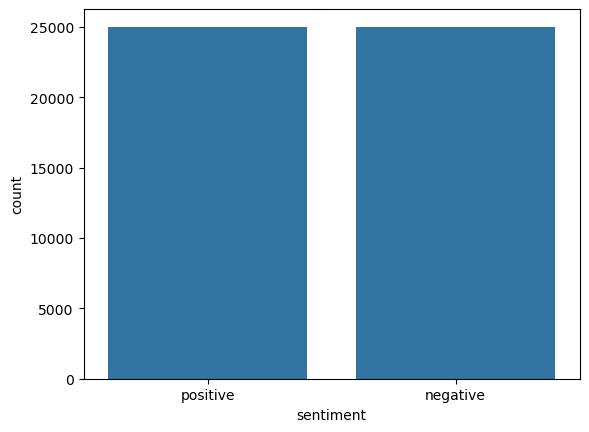

In [27]:
# Check countplot of sentiment column
sns.countplot(df, x= 'sentiment')

Observation: Here, we can see the positive and negative sentiment which are both equal at 25,000.

### Checking 'review' column

In [28]:
# Checking review's character length
df['review_char_len'] = df['review'].str.len()
df['review_char_len'].describe().to_frame().T.round(2)

,count,mean,std,min,25%,50%,75%,max
review_char_len,50000.0,1309.43,989.73,32.0,699.0,970.0,1590.25,13704.0


In [29]:
# Checking review's word length
df['review_word_len'] = df['review'].str.split().str.len()
df['review_word_len'].describe().to_frame().T.round(2)

,count,mean,std,min,25%,50%,75%,max
review_word_len,50000.0,231.16,171.34,4.0,126.0,173.0,280.0,2470.0


In [30]:
# Checking unique review 
df['review'].nunique()

49582

Observation: 49,582 reviews are unique and remaining 418 are similar to other reviews.

In [31]:
# Checking top 20 duplicate reviews
df['review'].value_counts().head(20)

review
Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.                                                                                                                                                                                                         

Observation: There are few reviews which are exactly same. It is not possible to have exactly same long reviews given by different individuals. There must be some technical or other problems.

In [32]:
# Dropping the duplicate reviews
df = df.drop_duplicates(subset= 'review')
df.shape

(49582, 4)

<Axes: xlabel='review_word_len', ylabel='Count'>

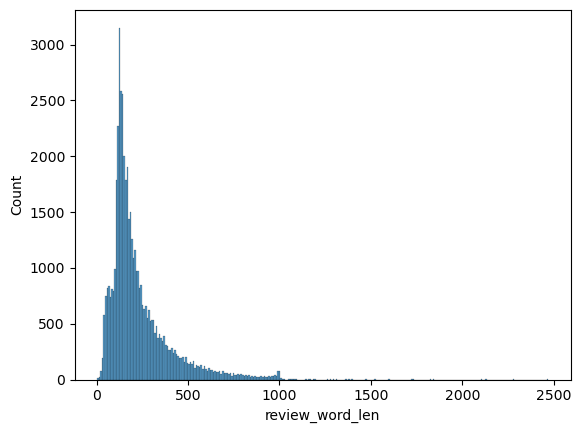

In [34]:
# Checking the distribution of review words length
sns.histplot(df, x= 'review_word_len')

Observation: The words length in review have rightly skewed distribution and there are few extreme length of reviews too.

In [35]:
# Split reviews into words
df['review_words'] = df['review'].str.split() 

uppercase_count = df['review_words'].apply(lambda words: sum(1 for w in words if w.isupper())).sum()
lowercase_count = df['review_words'].apply(lambda words: sum(1 for w in words if w.islower())).sum()
uppercase_count, lowercase_count

(240847, 9865638)

In [ ]:
Observation: There are 240847 words with uppercase and 9865638 words with lowercase.

In [36]:
# Count Emoji
import re
emoji_pattern = re.compile(
    "[" 
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags
    "]+", flags=re.UNICODE)

df['emoji_count'] = df['review'].apply(lambda x: len(emoji_pattern.findall(x)))

In [37]:
# Count Urls
url_pattern = r'https?://\S+|www\.\S+'
df['url_count'] = df['review'].str.count(url_pattern)

In [38]:
# Count Punctuation marks
import string
df['punct_count'] = df['review'].apply(lambda x: sum(1 for ch in x if ch in string.punctuation))

In [40]:
# Summary table
df[['emoji_count','url_count','punct_count']].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
emoji_count,49582.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
url_count,49582.0,0.00,0.07,0.0,0.0,0.0,0.0,3.0
punct_count,49582.0,52.61,43.94,0.0,24.0,40.0,67.0,657.0


Observation: There is no emojis in reviews. There are very few reviews with url. Some reviews have no punctuation and some have a lot of punctuations upto 657

### Cleaning 'review' column

Duplicates reviews are already removed above. 

In [42]:
# Converting to lowercase
df['review'] = df['review'].str.lower()

In [44]:
# Removing urls
df['review'] = df['review'].str.replace(url_pattern, '', regex=True)

In [45]:
# Remove <br /> and other HTML tag
df['review'] = df['review'].str.replace(r'<.*?>', '', regex=True)

In [46]:
# Remove weird punctuation
df['review'] = df['review'].str.replace(r'[^a-zA-Z0-9\s.,!?]', ' ', regex=True)

In [47]:
# Clean up extra spaces
df['review'] = df['review'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [48]:
# Only keeping the original columns on the dataframe
df = df[['review', 'sentiment']]

### Feature Engineering

In [49]:
# Replace sentiment column with numerical representation
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})

In [54]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42, stratify= df['sentiment'])

In [55]:
# TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=10000,
    ngram_range=(1, 2),
    min_df=5)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [56]:
# Checking the shape
print(X_train_tfidf.shape)
X_test_tfidf.shape

(39665, 10000)


(9917, 10000)

In [58]:
# Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1)

model.fit(X_train_tfidf, Y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [63]:
# Accuarcy of the model
from sklearn.metrics import accuracy_score

# Predict on test data
Y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.89


In [64]:
# Create a small predict function
def predict_sentiment(review_text: str) -> str: 
    review_vec = tfidf.transform([review_text])  # transform using the SAME fitted tfidf
    pred = model.predict(review_vec)[0]  # 0 or 1
    return "positive" if pred == 1 else "negative"

In [79]:
# Test with random reviews
print(predict_sentiment("This movie was amazing. Great acting and story!"))
print(predict_sentiment("Terrible plot. Boring and a waste of time."))
print(predict_sentiment('I thought movie was going to be brilliant but I was wrong.'))
predict_sentiment('movie was interesting in the beginning due to visuals but storyline was terrible so I got bored after 30 minutes of the movie.')

positive
negative
positive


'negative'